In [88]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
from scipy import signal
from scipy.fftpack import fftfreq
import matplotlib.pyplot as plt
import os
from scipy.signal import blackman
from tifffile import imread
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.fftpack import fft
from matplotlib.colors import LogNorm
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible

In [89]:
targetdir = '/Users/aimachine/Documents/JLMCurvature/FFTImageTest/'
sourceimage = '/Users/aimachine/Documents/JLMCurvature/FFTImageTest/FullResolution.tif'

base = os.path.split(sourceimage)[-1]

Filename = os.path.splitext(base)


In [90]:
#Enter time unit in seconds
Time_unit = 5
#Enter start y pixel unit for the section
StartSection = 0
#Enter end y pixel unit for section
EndSection = 20
#Range of Plot in Hertz
maxXrange = 0.03

745   122


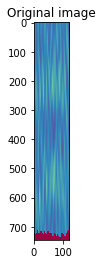

In [91]:
y = imread(sourceimage)
plt.figure()
plt.imshow(y, plt.cm.Spectral)
plt.title('Original image')
Xrange = y.shape[0]
Yrange = y.shape[1]
print(Xrange, " ", Yrange)
width = int(EndSection - StartSection)
block = int(Xrange / width)

Start = StartSection
End = EndSection

axes = 'XY'

/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


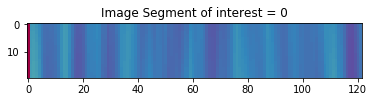

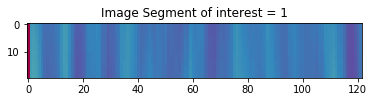

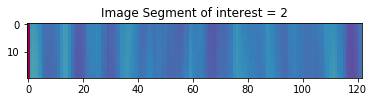

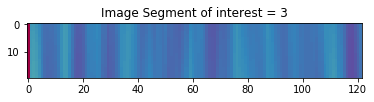

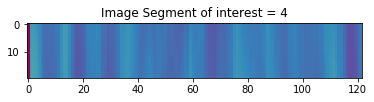

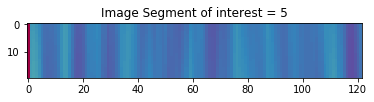

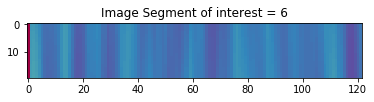

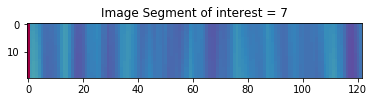

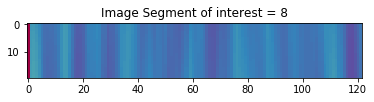

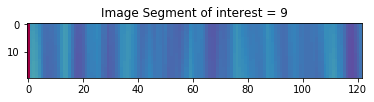

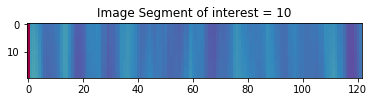

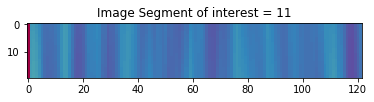

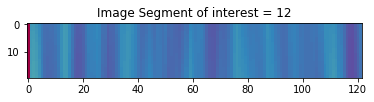

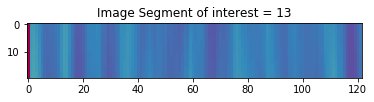

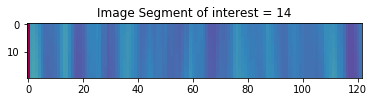

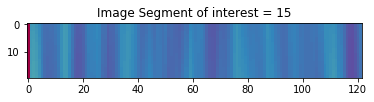

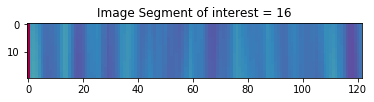

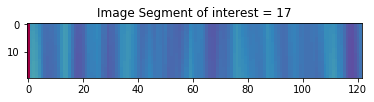

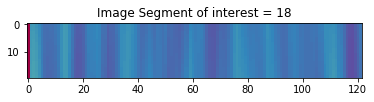

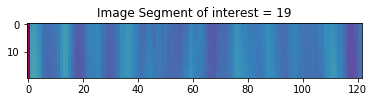

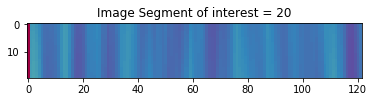

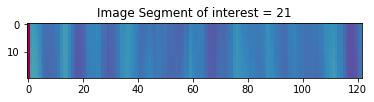

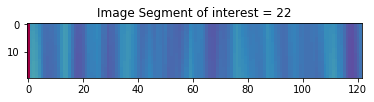

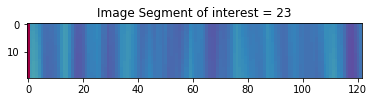

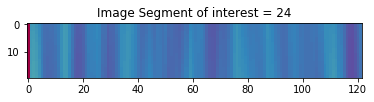

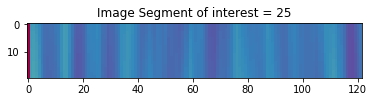

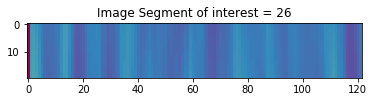

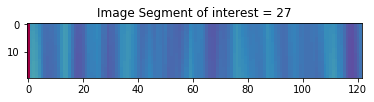

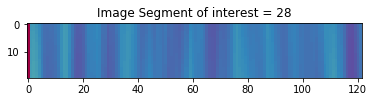

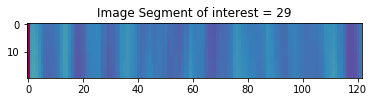

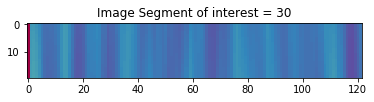

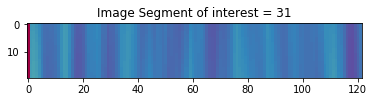

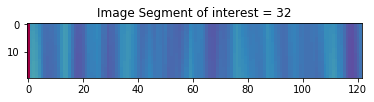

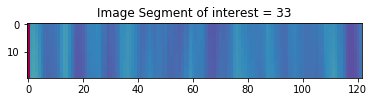

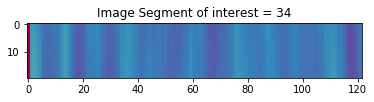

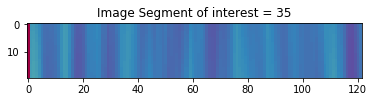

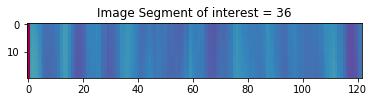

In [92]:

for i in range(block):
 plt.figure()
 
 fsmally = y[StartSection:EndSection, :]
 
    
 plt.imshow(fsmally, plt.cm.Spectral)
 plt.title('Image Segment of interest' + ' = ' + str(i))

In [93]:
#FFT with filter
def doFilterFFT(image, block, filter):
   addedfft = 0 
   PointsSample = image.shape[1] 
   for i in range(image.shape[0]):
      if filter == True:   
       w = blackman(PointsSample)
      if filter == False:
       w = 1
      strip = image[i,:]
      fftresult = fft(w * strip)
      addedfft += np.abs(fftresult)  
   addedfft/=image.shape[0]
   
   
   xf = fftfreq(PointsSample, Time_unit)
   
   
   return 2.0/PointsSample * addedfft[1:int(PointsSample//2)], xf[1:int(PointsSample//2)]

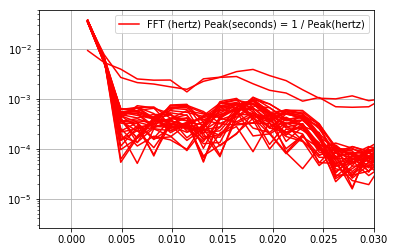

In [94]:

StartSection = Start
EndSection = End
Block = np.zeros([block])
for i in range(block):
 
 fsmally = y[StartSection:EndSection, :]

    
 StartSection = EndSection
 EndSection += width    
 onedimg, frequ = doFilterFFT(fsmally, i, True)
 
 plt.semilogy(frequ, onedimg, '-r')
 plt.xlim(xmax = maxXrange)
 plt.grid()
 plt.legend(['FFT (hertz) Peak(seconds) = 1 / Peak(hertz)']) 
 plt.savefig(targetdir + 'Filtered' + Filename[0] + str(block) + '.png')
 Block[i] =  block   

StartSection = Start
EndSection = End

